## Restore a dnnae for handwritten digits simulation

In [1]:
# Copyright (C) 2018 Zhixian MA <zx@mazhixian.me>

In [2]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
from dnnae.dnn import dnn
from dnnae.utils import utils

/home/mzx/.local/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
from dnnae.configs import config_mnist_bn
from dnnae.configs import config_train

### Load mnist data

In [6]:
# Step1 load MNITST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True, validation_size=5000)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
cf = config_mnist_bn
tr_cf = config_train

### Build the net

In [8]:
net = dnn(cf)
net.dnn_build()
# print the net structure
net.dnn_print()

Layer ID    Layer type    Layer shape
0 Input layer [None, 784]
1 FC layer 0 [None, 256]
2 BN layer 0 [None, 256]
3 FC layer 1 [None, 128]
4 BN layer 1 [None, 128]
5 Softmax layer [None, 10]
6 Encoder layer [None, 32]
7 FC layer 1 [None, 128]
8 BN layer 1 [None, 128]
9 FC layer 0 [None, 256]
10 BN layer 0 [None, 256]
11 Output layer [None, 784]


### Restore the net

In [9]:
net.get_learning_rate()
net.get_loss()
net.get_accuracy()
net.get_opt_mse()
net.get_opt_ce()

# load the net
import os
foldname = "./dnnae_mnist"
name = 'dnnae.pkl'
net.sess, name = utils.load_net(os.path.join(foldname, name))

INFO:tensorflow:Restoring parameters from ./dnnae_mnist/model_dnnae.ckpt


### Test the net

In [10]:
n_examples = 10
img_test, _ = mnist.test.next_batch(n_examples)

In [12]:
img_est = net.sess.run(
    net.outputs_de, 
    feed_dict={net.inputs: img_test, 
               net.outputs: img_test,
               net.is_training: False
               })

/home/mzx/.local/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


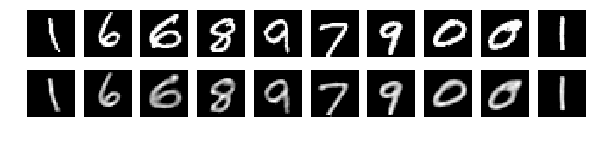

In [14]:
import numpy as np
fig, axs = plt.subplots(2, n_examples, figsize=(n_examples, 2))
for example_i in range(n_examples):
    # original
    axs[0][example_i].imshow(np.reshape(img_test[example_i, :], (28, 28)), cmap='gray')
    axs[0][example_i].axis('off')
    # reconstructed
    axs[1][example_i].imshow(np.reshape(img_est[example_i, :], (28, 28)), cmap='gray')
    axs[1][example_i].axis('off')

fig.show()
plt.draw()